In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('all_tass_models_binary.csv')

In [3]:
import pandas as pd
from sklearn.metrics import classification_report

# Definimos los nombres de las columnas de los modelos
columnas_modelos = ['sentiment_labelmdeberta', 'sentiment_labeldeberta', 'sentiment_labelroberta', 'sentiment_labelbart']

# Creamos un diccionario para almacenar las métricas de cada modelo
metricas_modelos = {}

# Calculamos las métricas para cada modelo
for columna_modelo in columnas_modelos:
    etiquetas_reales = df['Sentimiento']
    etiquetas_predichas = df[columna_modelo]
    
    # Generamos el reporte de clasificación que contiene precision, recall y F1-score para cada clase
    reporte_clasificacion = classification_report(etiquetas_reales, etiquetas_predichas, output_dict=True)
    accuracy = accuracy_score(etiquetas_reales, etiquetas_predichas)
    # Guardamos las métricas en el diccionario
    metricas_modelos[columna_modelo] = {'Accuracy': accuracy,
                                        'Precision_Positive': reporte_clasificacion['positive']['precision'],
                                          'Recall_Positive': reporte_clasificacion['positive']['recall'],
                                          'F1_Score_Positive': reporte_clasificacion['positive']['f1-score'],
                                          'Precision_Negative': reporte_clasificacion['negative']['precision'],
                                          'Recall_Negative': reporte_clasificacion['negative']['recall'],
                                          'F1_Score_Negative': reporte_clasificacion['negative']['f1-score']}

# Creamos un DataFrame a partir del diccionario de métricas
df_metricas = pd.DataFrame(metricas_modelos)

# Mostramos la tabla de métricas
display(df_metricas)


,sentiment_labelmdeberta,sentiment_labeldeberta,sentiment_labelroberta,sentiment_labelbart
Accuracy,0.763587,0.741848,0.650815,0.702446
Precision_Positive,0.680000,0.642222,0.563674,0.614849
Recall_Positive,0.855346,0.908805,0.849057,0.833333
F1_Score_Positive,0.757660,0.752604,0.677541,0.707610
Precision_Negative,0.863095,0.898601,0.813230,0.826230
Recall_Negative,0.693780,0.614833,0.500000,0.602871
F1_Score_Negative,0.769231,0.730114,0.619259,0.697095


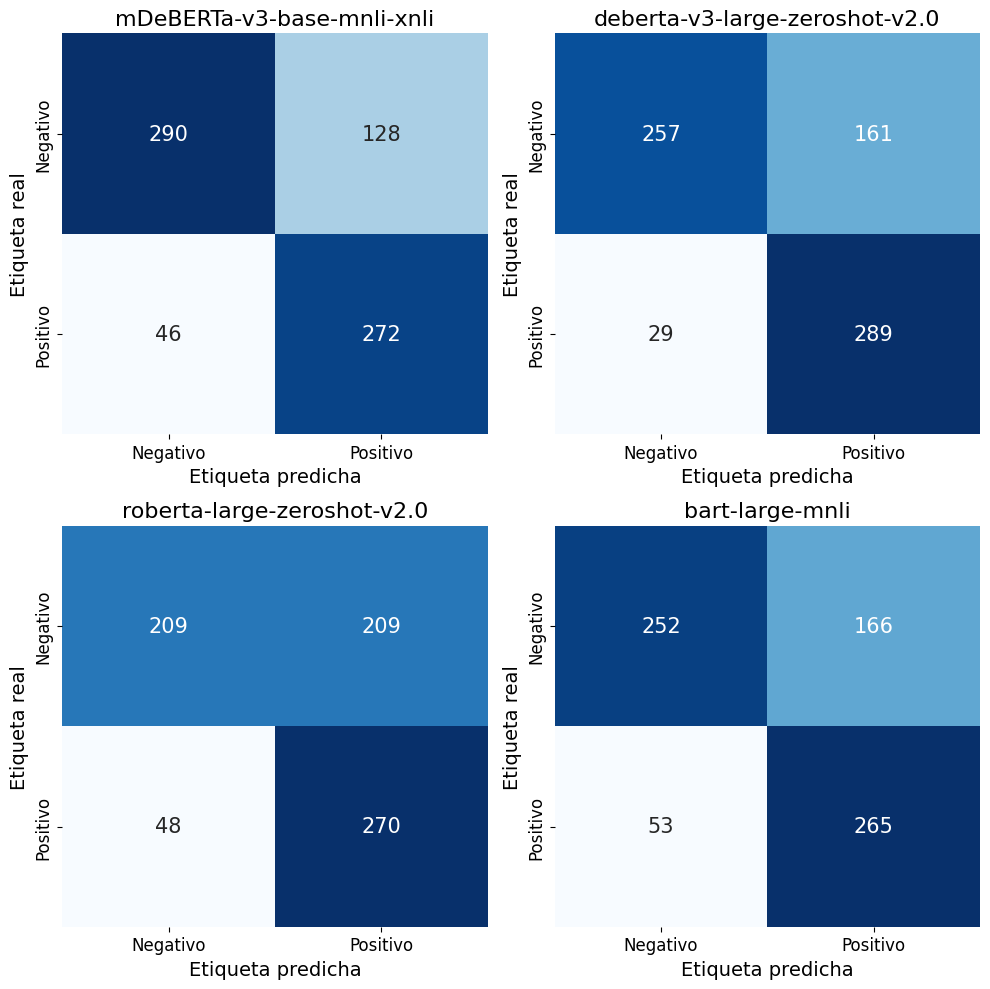

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Definimos los títulos personalizados y las columnas de los modelos
titulos_personalizados = ['mDeBERTa-v3-base-mnli-xnli', 'deberta-v3-large-zeroshot-v2.0', 'roberta-large-zeroshot-v2.0', 'bart-large-mnli']
columnas_modelos = ['sentiment_labelmdeberta', 'sentiment_labeldeberta', 'sentiment_labelroberta', 'sentiment_labelbart']

# Creamos subplots con dos filas y dos columnas
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Iteramos sobre los modelos y sus respectivos títulos personalizados, organizándolos en dos filas y dos columnas
for i, (titulo_personalizado, columna_modelo) in enumerate(zip(titulos_personalizados, columnas_modelos)):
    # Calculamos el índice de fila y columna
    fila = i // 2
    columna = i % 2
    
    # Calculamos la matriz de confusión normalizada
    confusion_mat = confusion_matrix(df['Sentimiento'], df[columna_modelo])
    # confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]
    
    # Graficamos la matriz de confusión como un heatmap en el subplot correspondiente
    sns.heatmap(confusion_mat, annot=True, cmap='Blues', ax=axs[fila, columna], cbar=False, annot_kws={"size": 15}, fmt='d')
    
    # Configuramos los títulos y etiquetas de los ejes
    axs[fila, columna].set_title(titulo_personalizado, fontsize=16) 
    axs[fila, columna].set_xlabel('Etiqueta predicha', fontsize=14)
    axs[fila, columna].set_ylabel('Etiqueta real', fontsize=14)
    axs[fila, columna].xaxis.set_ticklabels(['Negativo', 'Positivo'], fontsize=12)
    axs[fila, columna].yaxis.set_ticklabels(['Negativo', 'Positivo'], fontsize=12)

# Ajustamos el espacio entre subplots y mostramos la gráfica
plt.tight_layout()
plt.show()


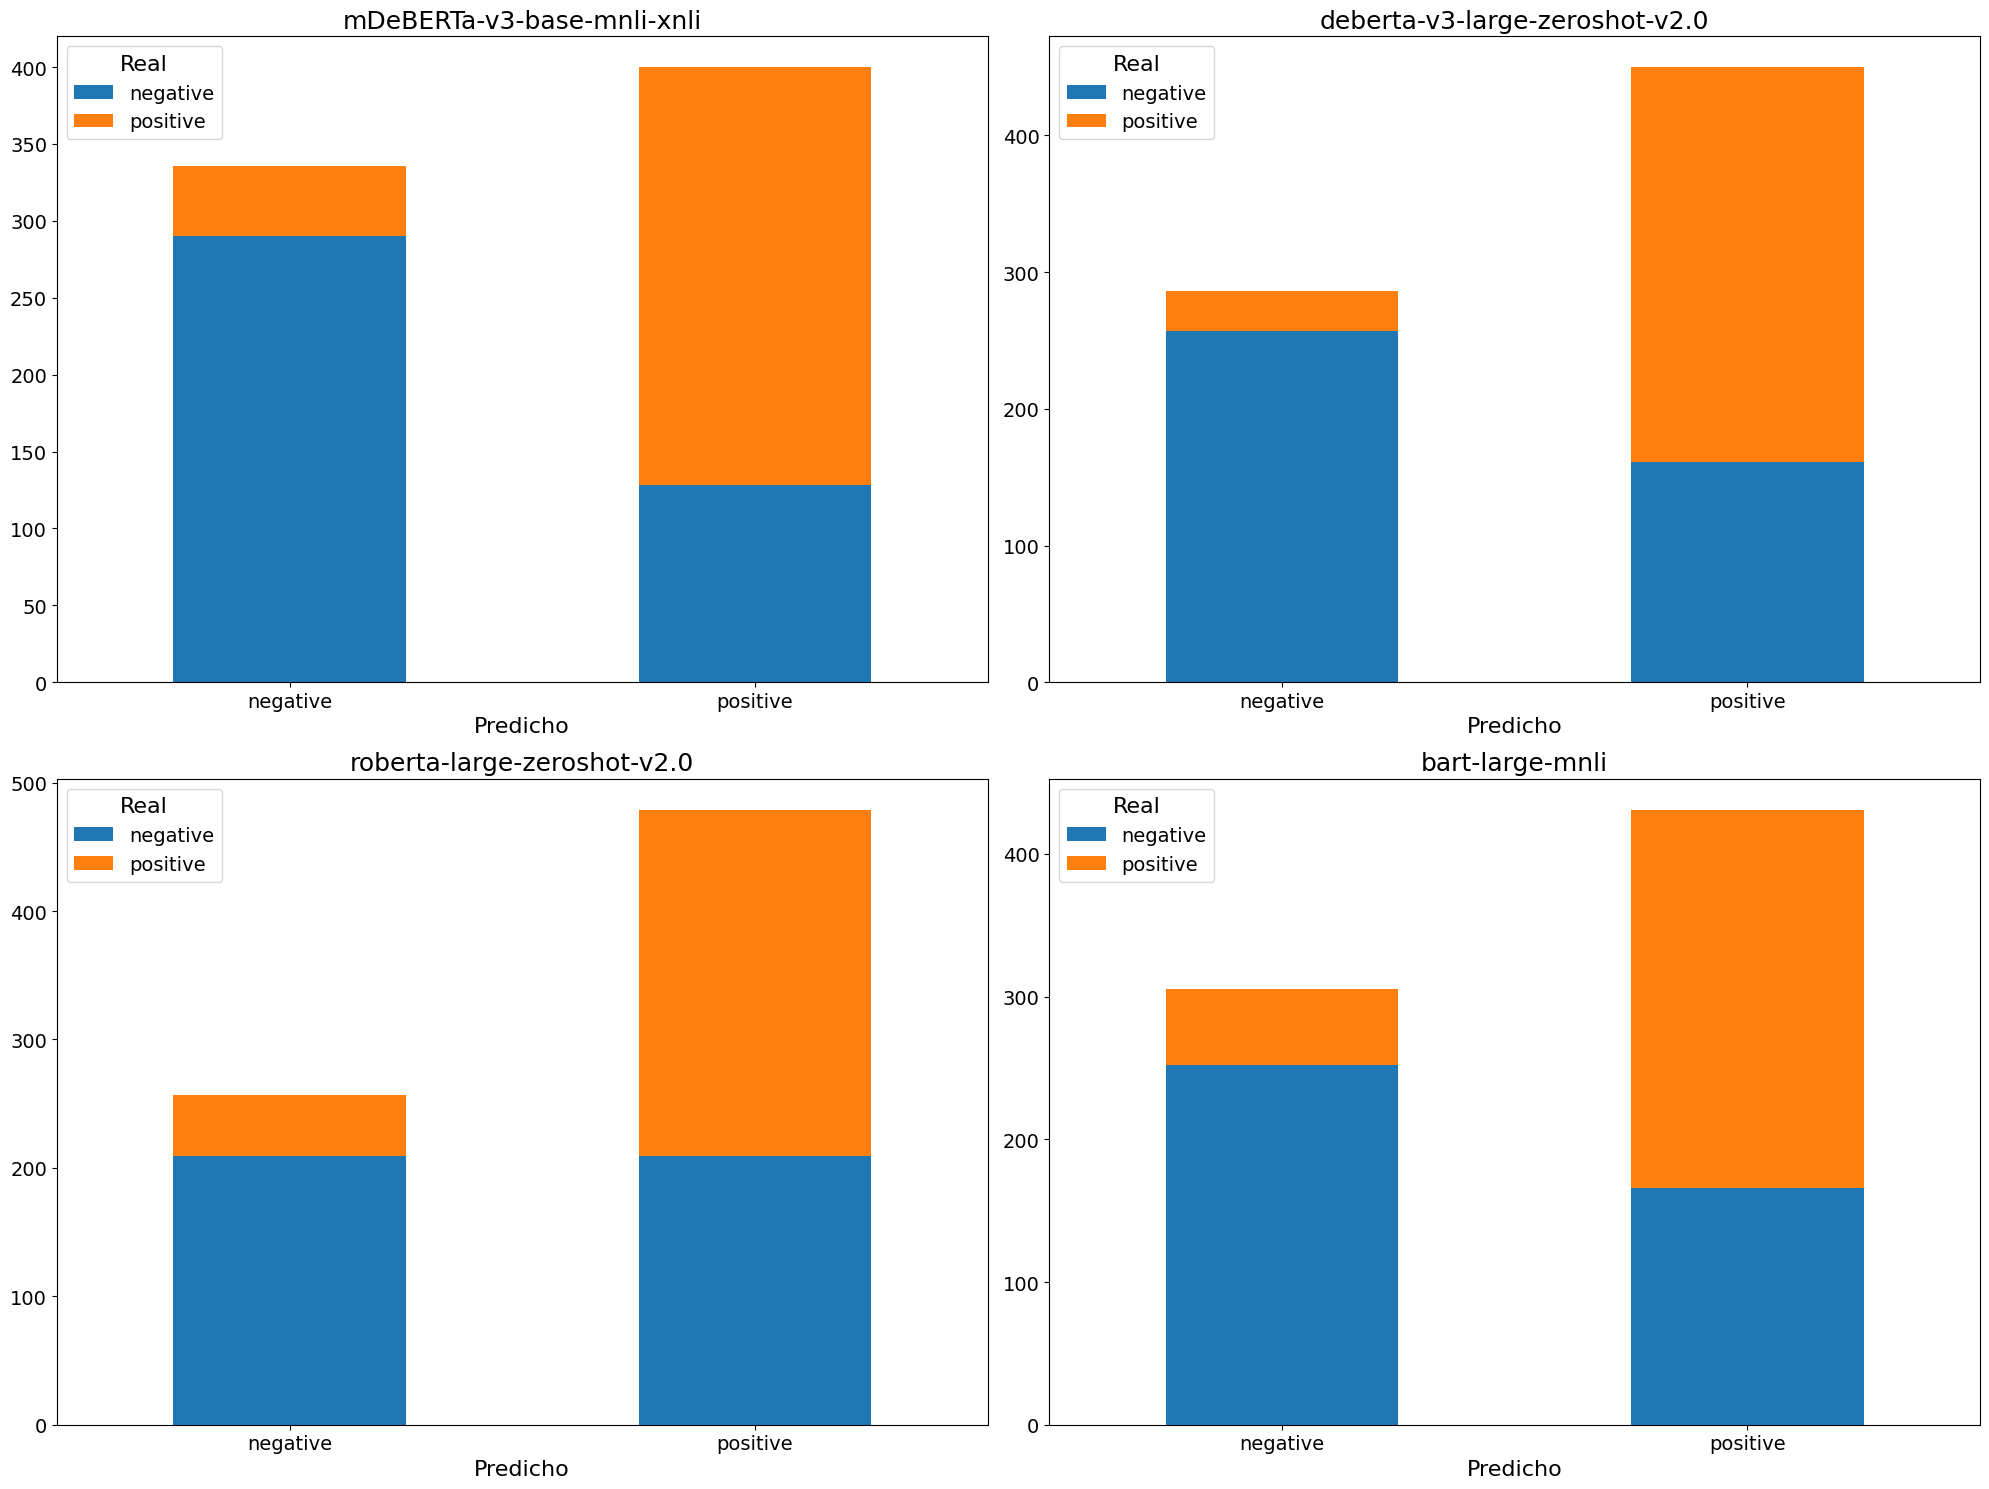

In [27]:
columnas_modelos = ['sentiment_labelmdeberta', 'sentiment_labeldeberta', 'sentiment_labelroberta', 'sentiment_labelbart']
titulos_personalizados = ['mDeBERTa-v3-base-mnli-xnli', 'deberta-v3-large-zeroshot-v2.0', 'roberta-large-zeroshot-v2.0', 'bart-large-mnli']

# Creamos subplots con dos filas y dos columnas, aumentando el tamaño
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Iteramos sobre los modelos y sus respectivos títulos personalizados, organizándolos en dos filas y dos columnas
for i, (columna_modelo, name_modelo) in enumerate(zip(columnas_modelos, titulos_personalizados)):
    # Calculamos el índice de fila y columna
    fila = i // 2
    columna = i % 2
    
    # Calculamos la tabla de frecuencia cruzada para el modelo actual
    age_sentiment = pd.crosstab(df[columna_modelo], df['Sentimiento'])
    
    # Graficamos el gráfico de barras apiladas en el subplot correspondiente
    age_sentiment.plot(kind='bar', stacked=True, ax=axs[fila, columna], figsize=(20, 15))
    
    # Configuramos el título, etiquetas de los ejes y leyenda del subplot
    axs[fila, columna].set_title(name_modelo, fontsize=18)
    axs[fila, columna].set_xlabel('Predicho', fontsize=16)
    axs[fila, columna].set_ylabel('', fontsize=14)
    axs[fila, columna].legend(title='Real', fontsize=14, title_fontsize=16)

    axs[fila, columna].tick_params(axis='y', which='major', labelsize=14)
    axs[fila, columna].tick_params(axis='x', which='major', labelrotation=0, labelsize=14)  # Rotación horizontal de las etiquetas del eje x

# Ajustamos el espacio entre subplots y mostramos la gráfica
plt.tight_layout()
plt.show()
